In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df = pd.read_csv('data.csv')
dfr = pd.read_csv('reddit_politics.csv')
import sys
import numpy as np
from PIL import Image

In [8]:
df.head()


,Title,PoliticalLean,Score,Id,Subreddit,URL,NumComments,Text,Date
0,"No matter who someone is, how they look like, ...",Liberal,1,t5fybt,socialism,https://v.redd.it/ng5fyl7hp2l81,0,NaN,1646271777
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,t5fqdn,democrats,https://www.reuters.com/world/us/biden-speech-...,1,NaN,1646271108
2,State of the union,Liberal,1,t5fj9a,DemocraticSocialism,https://www.reddit.com/r/DemocraticSocialism/c...,1,Who watched the state of the union last night ...,1646270488
3,We Should Just Give Poor People Money,Liberal,7,t5f7n9,SocialDemocracy,https://youtu.be/a80kRjpubG0,3,NaN,1646269508
4,Do it for the Dew,Liberal,6,t5es2c,democrats,https://i.redd.it/drmunn90f2l81.jpg,1,NaN,1646268183


In [118]:
demtext = df.iloc[:,0]
df.columns
demtext = df[df.PoliticalLean == "Liberal"]
reptext = df[df.PoliticalLean == "Conservative"]
# demtext.head()
# reptext.head()
demstring = ""
repstring = ""
# print(demtext[0])
demstring = "".join(words for words in demtext.Title)
stopwords = set(STOPWORDS)
new_words = ['U','S']
new_stopwords = stopwords.union(new_words)
demstring = re.sub('U\.S\.', 'America', demstring)
# for words in demtext:
#     dembigstring = dembigstring + words
print(demstring)

repstring = "".join(words for words in reptext.Title)
repstring = re.sub('U\.S\.', 'America', repstring)
# print(repstring)

No matter who someone is, how they look like, what language they speak, what they wear, remember the human. For the sake of humanity, the working class can and must unite across all arbitrary boundaries.Biden speech draws 38.2 million America TV viewersState of the unionWe Should Just Give Poor People MoneyDo it for the DewProposed Bill Would Allow Kids With Contagious Diseases To Attend Schools3 House Republicans voted against a bipartisan resolution to stand 'steadfastly' with the Ukrainian peopleIf you're bombing civilian targets, you're the bad guy.Every city have to government their resources and give best quality producen to a country environment. And stop financing Political partis which cost 100x govermant spending.Workers Behind First Union Push at an Amazon Retail Store Want $25/hrReligion have a lot of sticks to grow, capitalism just Association.Be careful when you post to r/politics and r/askreddit - trolls are trying to get you bannedThe GOP Knows Biden’s SCOTUS Pick Is Pe

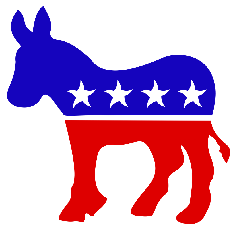

In [139]:
dem_mask = np.array(Image.open("dem.png"))
image_colors = ImageColorGenerator(dem_mask)
plt.imshow(dem_mask)
plt.axis("off")
plt.show()

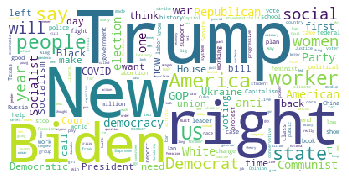

In [157]:
demwc = WordCloud(collocations = False, background_color = 'white',max_words = 1000, stopwords = new_stopwords).generate(demstring)
plt.imshow(demwc)
plt.axis("off")
plt.show()

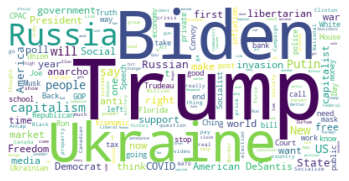

In [158]:
repwc = WordCloud(collocations = False, background_color = 'white', stopwords = new_stopwords).generate(repstring)
plt.imshow(repwc, interpolation='bilinear')
plt.axis("off")
plt.show()